In [357]:
import os
print(os.getcwd())

import pandas as pd
df = pd.read_csv('data/iris.csv', header=0, sep=",")
print(df.shape)

c:\Users\mikel\OneDrive\Desktop\Machine Learning\project
(150, 5)


In [358]:
data = pd.read_csv('data/winequality-red.csv', header=0, sep=",")
print(data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

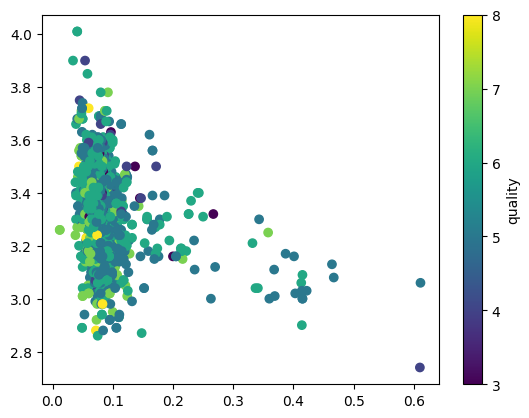

In [359]:
import matplotlib.pyplot as plt
import numpy as np

x = data['chlorides']
y = data['pH']
plt.scatter(x, y, marker='o', c = data['quality'])
plt.colorbar(label='quality')
plt.show()

In [360]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [361]:
# for x in df.iterrows():
#     print(x)

species_mapping = {'setosa': 0, 'versicolor': 1,'virginica': 2}
df['species'] = df['species'].replace(species_mapping).fillna(1).astype(int)
print(df)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


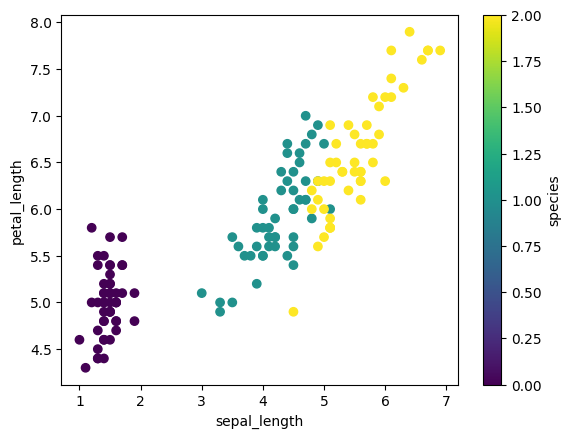

In [362]:
x = df['petal_length']
y = df['sepal_length']
plt.scatter(x, y, marker='o', c = df['species'])
plt.colorbar(label='species')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

In [363]:
def eigsort(A):
    eigvals, U = np.linalg.eig(A)
    # sort eigenvalues in descending order
    order = np.argsort(eigvals)[::-1]
    eigvals = eigvals[order]
    #re-arrange the eigenvectors
    U = U[:,order]
    return U, eigvals

In [364]:
def pca_classic(X, M):

    #για κάθε στήλη του πίνακα X υπολογίστε το μέσο όρο, και αποθηκεύστε το σε διάνυσμα γραμμής
    # mu = X.mean(axis=0).reshape( (1,-1) )
    mu = np.mean(X)

    #αφαιρέστε το μέσο όρο από τον πίνακα
    normalized_X = X-mu

    #υπολογίστε το Covariance matrix για τον πίνακα του προηγούμενου βήματος
    S = (1/X.shape[0]) * normalized_X.T.dot( normalized_X )

    #υπολογίστε τα ιδιοδιανύσματα και τις ιδιοτιμές του covariance πίνακα
    eigvectors, eigvals = eigsort( S )

    #κρατήστε στον πίνακα U τις πρώτες Μ στήλες των ιδιοδιανυσμάτων
    U = eigvectors[:,:M]
    #κρατήστε στον πίνακα Lambads τις πρώτες Μ ιδιοτιμές
    Lambdas = eigvals[:M]
    print( X.shape, U.shape, Lambdas.shape )

    #αποθηκεύστε το μετασχηματισμό Z = U * X ( προσέξτε τις διαστάσεις )
    #ο πίνακας U εφαρμόζεται στον κανονικοποιημένο πίνακα X και τον προβάλει
    #επάνω στα ιδιοδιανύσματα(μειωμένη διάσταση)
    Z = normalized_X.dot(U)
    return Z, U, Lambdas, mu

c:\Users\mikel\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(150, 5) (5, 2) (2,)
hello
(150, 2)
(150,)
(5, 2)
(2,)
(150, 10)
(150,)


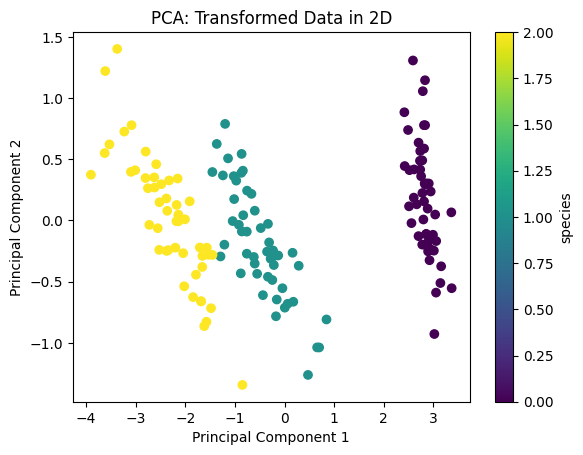

In [365]:
X = df
M = 2
Z, eigvecs, eigvals, mu = pca_classic(X, M)
X_rec = Z.dot(eigvecs.T) + mu
ind = np.random.permutation(X.shape[0])

print('hello')
print(Z.shape)
print(Z[0].shape)
print(eigvecs.shape)
print(eigvals.shape)
print(X_rec.shape)
print(ind.shape)

plt.scatter(Z[0], Z[1], marker='o', c=df['species'])
plt.colorbar(label='species')
plt.title('PCA: Transformed Data in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.xlim(-50, 50)
plt.show()


<h2>Part 2 - Least Squares</h2>

In [366]:
X = Z[0].to_numpy().reshape(Z[0].size, 1)
y = Z[1].to_numpy().reshape(Z[1].size, 1)

In [367]:
print(X.shape, y.shape)

(150, 1) (150, 1)


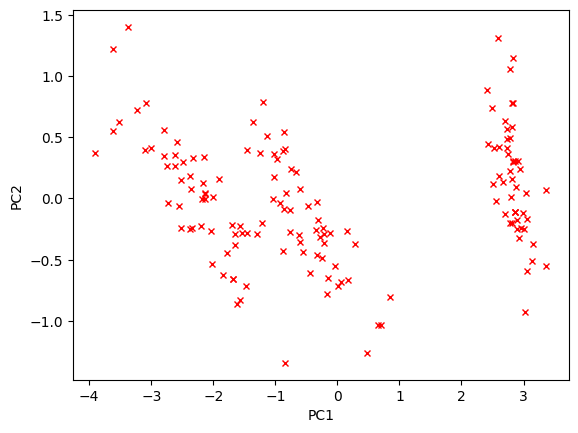

In [368]:
plt.plot( X, y, 'rx', markersize=5 )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [369]:
m = X.shape[0]#total number of examples

X = np.hstack( [ np.ones( (m,1) ), X ]  )#add a column of 1s at the beginning
theta = np.zeros( (2,1) )#parameters theta are assigned to 0
iterations = 1500
alpha = 0.01#the learning rate
y = df[["species"]].to_numpy()

In [370]:
y.shape

(150, 1)

In [371]:
theta.shape

(2, 1)

In [372]:
X.shape

(150, 2)

In [373]:
def computeCost(X, y, theta ):
    #Input: data points: X, labels: y
    #Return: #Compute the cost for Linear Regression

    m = X.shape[0]#number of training examples

    #cost = np.sum((X.dot(theta)-y)**2)/(2*m)

    # You need to return the following variables correctly
    J = 0

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.

    J = (1 / (2.0*m) ) * np.sum( ( ( np.dot(X,theta)-y)**2 ) )

    return J


In [374]:
def gradientDescent(X, y, theta, alpha, num_iters):
    #GRADIENTDESCENT Performs gradient descent to learn theta
    #   theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by
    #   taking num_iters gradient steps with learning rate alpha

    m = X.shape[0]#number of training examples
    J_history = np.zeros( (num_iters,1) )

    for which_iter in range(num_iters):

        # ====================== YOUR CODE HERE ======================
        # Instructions: Perform a single gradient step on the parameter vector
        #               theta.
        #
        # Hint: While debugging, it can be useful to print out the values
        #       of the cost function (computeCost) and gradient here.
        #

        # temp0 = theta[0] - alpha*np.sum((X.dot(theta)-y)*X[:,0].reshape((-1,1)))/m
        # temp1= theta[1] - alpha*np.sum((X.dot(theta)-y)*X[:,1].reshape((-1,1)))/m
        """
        ###begin solution1
        cost = computeCost( X, y, theta )

        new_theta = np.zeros_like( theta )

        for j in range( len(new_theta) ):
            Suma = 0
            for i in range( m ):
                Suma += ( np.dot(theta.T,X[i,:]) - y[i] ) * X[i][j]
            new_theta[j] = theta[j] - alpha * Suma / ( m + 0.0 )

        theta = new_theta

        J_history[which_iter] = cost
        continue
        ###end of solution1
        """

        #calculate error
        error = ( np.dot(X,theta) ) - y

        #calculate theta parameters
        temp0 = theta[0] - ( alpha / m ) * np.sum( error * X[:,0].reshape( (-1,1) ) )
        temp1 = theta[1] - ( alpha / m ) * np.sum( error * X[:,1].reshape( (-1,1) ) )

        #update theta with the new values
        theta = np.array( [temp0, temp1] )

        #print( theta )
        #Save the cost J in every iteration
        J_history[which_iter] = computeCost(X, y, theta)

    return ( J_history, theta )


In [375]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Function to compute the cost of the current theta
# def computeCost(X, y, theta):
#     m = len(y)
#     h = np.dot(X, theta)
#     J = (1 / (2 * m)) * np.sum(np.square(h - y))
#     return J

# # Gradient Descent Function
# def gradientDescent(X, y, theta, alpha, num_iters):
#     m = len(y)
#     J_history = np.zeros(num_iters)

#     for iter in range(num_iters):
#         error = np.dot(X, theta) - y
#         theta = theta - (alpha / m) * np.dot(X.T, error)
#         J_history[iter] = computeCost(X, y, theta)

#     return J_history, theta

# # Generate a simple dataset for demonstration
# np.random.seed(42)
# X = 2 * np.random.rand(100, 1)
# y = 4 + 3 * X + np.random.randn(100, 1)

# # Add a column of ones to X (for the bias term)
# X_b = np.c_[np.ones((100, 1)), X]

# # Initialize theta
# theta = np.zeros((2, 1))

# # Set hyperparameters
# alpha = 0.01
# num_iters = 1000

# # Run Gradient Descent
# J_history, new_theta = gradientDescent(X_b, y, theta, alpha, num_iters)

# # Print the final theta
# print("Theta found by gradient descent: {}".format(new_theta))

# # Plot the training data and the linear regression line
# plt.scatter(X, y, label='Training Data')
# plt.plot(X, np.dot(X_b, new_theta), 'r-', label='Linear Regression')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.legend()
# plt.show()


In [376]:
X.shape

(150, 2)

In [377]:
computeCost(X, y, theta)

0.8333333333333334

In [378]:
J_history, new_theta = gradientDescent(X, y, theta, alpha, iterations )

In [379]:
new_theta

array([[ 0.99999972],
       [-0.35753221]])

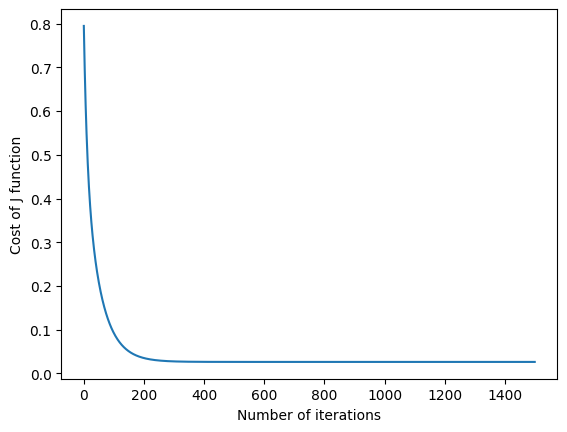

In [380]:
plt.plot( np.arange(J_history.shape[0]), J_history )
plt.xlabel( 'Number of iterations' )
plt.ylabel( 'Cost of J function' )
plt.show()

<h2>Part 3 - Logistic Regression</h2>

In [381]:
X = Z.to_numpy()

In [382]:
X = np.hstack( [ np.ones( ( X.shape[0],1) ), X ]  )

In [383]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [384]:
print( X_train.shape )
print( y_train.shape )
print( X_test.shape )
print( y_test.shape )

(100, 3)
(100, 1)
(50, 3)
(50, 1)


In [385]:
m, n = X.shape
mu = np.zeros( (X_train.shape[1], 1) )
stdu = np.zeros( (X_train.shape[1], 1) )
for j in range(1,n):
    mu[j] = X[:,j].mean()
    stdu[j] = X[:,j].std()

stdu[0] = 1#because otherwise it will divide by 0 later on standarization

In [386]:
np.mean(X, axis = 0).reshape(-1,1)
np.std(X, axis = 0).reshape(-1,1)

array([[0.        ],
       [2.19152941],
       [0.5004056 ]])

In [387]:
mu

array([[ 0.00000000e+00],
       [-1.89478063e-16],
       [-4.97379915e-16]])

In [388]:
stdu

array([[1.        ],
       [2.19152941],
       [0.5004056 ]])

In [389]:
for j in range(1,n):
    X_train[:, j] = (X_train[:, j] - mu[j] ) / stdu[j]

In [390]:
for j in range(1,n):
    X_test[:, j] = (X_test[:, j] - mu[j] ) / stdu[j]

In [391]:
pd.DataFrame( X_train ).head()

,0,1,2
0,1.0,-0.160427,-0.508680
1,1.0,-1.609386,1.243227
2,1.0,-0.281945,-0.596042
3,1.0,1.307537,0.605070
4,1.0,-1.652922,1.101304


In [392]:
pd.DataFrame( X_test ).head()

,0,1,2
0,1.0,-0.392240,-0.180027
1,1.0,1.101800,1.767987
2,1.0,-1.779258,0.747525
3,1.0,-0.346512,-0.182334
4,1.0,-0.566270,0.736210


In [393]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

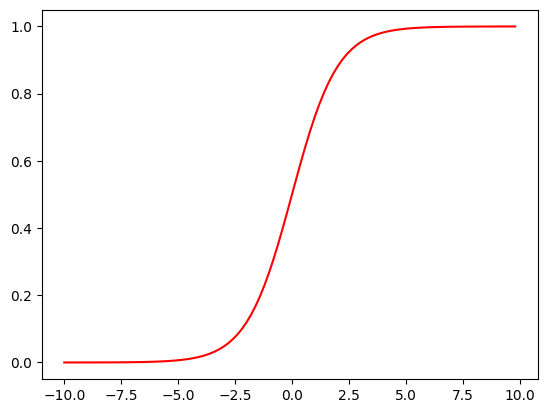

In [394]:
x = np.arange(-10., 10., 0.2)
plt.plot(x, sigmoid(x),'r')
plt.show()

In [395]:
def ComputeCostGrad( X, y, theta, _lambda ):
    m, n = X.shape

    h = sigmoid( X.dot(theta) )#hypothesis h_theta    

    #calc cost function
    reg = (_lambda / (2.0 ) ) * np.sum(theta**2)#reguralization
    # cur_j = - (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h))) + reg
    
    cur_j=0
    for i in range(0, m):
        # print(np.log(h))
        cur_j += y * np.log(h)

    #calculate gradient
    reg = _lambda * theta# /(m+0.0)
    grad = - ( X.T.dot( y - h ) ) + reg
    
    return cur_j, grad


def ComputeLogisticRegression( X, y, X_val, y_val, _lambda=0.0, tot_iter=2000, alpha=0.0005 ):

    theta = np.zeros(X.shape[1]).reshape( (-1,1) )

    m, n = X.shape

    J_train = []
    J_test = []

    for i in range( tot_iter ):

        train_error, train_grad = ComputeCostGrad( X, y, theta, _lambda )
        test_error, _ = ComputeCostGrad( X_val, y_val, theta, _lambda )

        #update parameters by subtracting gradient values
        theta -= alpha * train_grad

        #print( train_error )
        #store current cost
        J_train.append( train_error[0] )
        J_test.append( test_error[0] )

    return J_train, J_test, theta


In [396]:
def predict(theta, X):
    #PREDICT Predict whether the label is 0 or 1 using learned logistic
    #regression parameters theta
    #   p = PREDICT(theta, X) computes the predictions for X using a
    #   threshold at 0.5 (i.e., if sigmoid( X * theta ) >= 0.5, predict 1)

    m = X.shape[0]

    #You need to return the following variables correctly
    p = np.zeros( (m,1) )
    p = sigmoid( np.dot(X,theta) )
    prob = p
    p = p > 0.5 - 1e-6

    return p, prob

In [397]:
J_train, J_test, theta = ComputeLogisticRegression( X_train, y_train, X_test, y_test, _lambda=0 )

In [398]:
J_train

[array([-69.31471806]),
 array([-67.52321149]),
 array([-65.78769296]),
 array([-64.10649074]),
 array([-62.4779279]),
 array([-60.90033053]),
 array([-59.37203526]),
 array([-57.89139592]),
 array([-56.45678943]),
 array([-55.0666209]),
 array([-53.71932796]),
 array([-52.41338435]),
 array([-51.1473029]),
 array([-49.91963782]),
 array([-48.72898646]),
 array([-47.57399058]),
 array([-46.45333712]),
 array([-45.36575861]),
 array([-44.31003321]),
 array([-43.28498444]),
 array([-42.28948071]),
 array([-41.32243459]),
 array([-40.3828019]),
 array([-39.4695807]),
 array([-38.58181013]),
 array([-37.71856919]),
 array([-36.87897544]),
 array([-36.06218365]),
 array([-35.26738448]),
 array([-34.49380307]),
 array([-33.74069768]),
 array([-33.00735833]),
 array([-32.29310548]),
 array([-31.59728867]),
 array([-30.91928526]),
 array([-30.25849922]),
 array([-29.61435983]),
 array([-28.98632062]),
 array([-28.37385815]),
 array([-27.77647099]),
 array([-27.19367863]),
 array([-26.62502056]

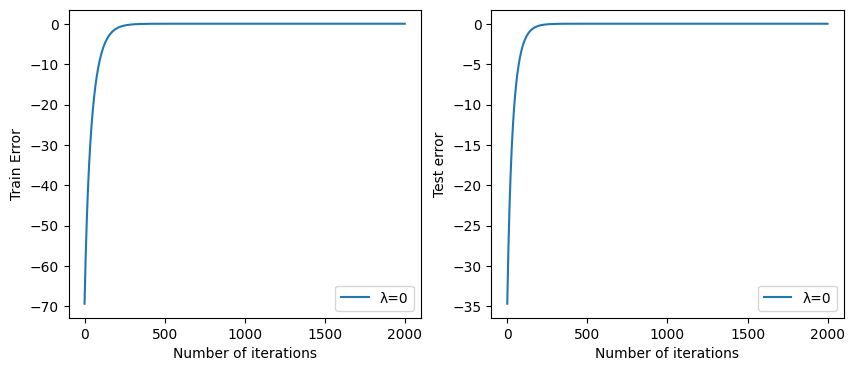

Accuracy of training set 0.66
Accuracy of testing set 0.68


In [399]:
plt.figure( figsize=(10,4) )
plt.subplot( 1, 2, 1 )
plt.plot( np.arange( len(J_train) ), J_train, label='λ=0' )
plt.xlabel( 'Number of iterations' )
plt.ylabel( 'Train Error' )
plt.legend()
plt.subplot( 1,2,2)
plt.plot( np.arange( len(J_test) ), J_test, label='λ=0' )
plt.xlabel( 'Number of iterations' )
plt.ylabel( 'Test error' )
plt.legend()
plt.show()
p_train, prob_train = predict( theta, X_train )
p_test, prob_test = predict( theta, X_test )
print( 'Accuracy of training set', np.mean( p_train.astype('int') == y_train ) )
print( 'Accuracy of testing set', np.mean( p_test.astype('int') == y_test ) )

<h2>Part 4- KNN algorithm

In [400]:
def sqrdist(x, y):
    y = np.tile(y,(x.shape[0],1))
    d = np.sqrt((np.square(x-y).sum(axis=1)))
    return d

In [401]:
my_X = df.iloc[:, :-1]
my_X = my_X.to_numpy()
my_X = np.hstack( [ np.ones( ( my_X.shape[0],1) ), my_X ]  )
my_y = df.iloc[:, -1]
my_y = my_y.to_numpy().reshape(my_y.size, 1)

X_train, X_test, y_train, y_test = train_test_split(my_X, my_y, test_size=0.33, random_state=42)

In [402]:
def knn_test(X, T, Xtest, K):
    Ntest = Xtest.shape[0]
    Ttest = np.zeros((Ntest, 2))
    for n in range(Ntest):
        d = sqrdist(X, Xtest[n,:])
        # return the indices of the K closest instances
        closest = np.argsort(d)[:K]
        # get the predicted values of the closest instances
        Tclosed = T[closest,:]
        print(Tclosed)
        votes = Tclosed.sum(axis=0)
        print(votes)
        Ttest[n, np.argmax(votes)] = 1
    return Ttest

In [403]:
def my_knn(Xtrain, ytrain, Xtest, K):
    ntest = Xtest.shape[0]
    ytest = np.zeros(ntest)
    for n in range(ntest):
        d = sqrdist(Xtrain, Xtest[n,:])
        closest = np.argsort(d)[:K]
        yclosest = ytrain[closest,:].reshape(ytrain[closest,:].size,)
        ytest[n] = np.argmax(np.bincount(yclosest))
    return ytest.reshape(ytest.size, 1)


In [404]:
Ytest = my_knn(X_train, y_train, X_test, 5)
countFalse = 0
for i in range(50):
    if(Ytest[i] != y_test[i]):
        countFalse += 1
print(countFalse)

1


In [405]:
def cross_validation(K, numFolds, X, T):
    """
    """
    N = X.shape[0]
    #random permute the data before we split them
    np.random.seed(10)
    perm = np.random.permutation(N)
    X = X[perm]
    T = T[perm]
    # The fold variable will have size numFolds + 1
    chunk_size = int(N/numFolds)
    split_ind = np.arange(chunk_size,chunk_size*numFolds, chunk_size)
    if chunk_size*numFolds < N:
        split_ind[-1] = N-1
    else:
        last_chunk = chunk_size
    Xfolds = np.vsplit(X, split_ind)
    Tfolds = np.vsplit(T, split_ind)
    valerr = np.zeros((K, numFolds))
    for k in range(1, K+1):
        for j in range(numFolds):
            X_train = np.vstack([Xfolds[i] for i in range(len(Xfolds)) if i != j])
            y_train = np.vstack([Tfolds[i] for i in range(len(Tfolds)) if i != j])
            X_test = Xfolds[j]
            y_test = Tfolds[j]
            # prediction using kNN
            Ttest = my_knn(X_train, y_train, X_test, k)
            # Compute the percent misclassified data points
            # Tval = np.argmax(Ttest, axis=1)
            # Tcor = np.argmax(Tfolds[j], axis=1)
            countFalse = 0
            for i in range (Ttest.size):
                if(Ttest[i]!=y_test[i]):
                    countFalse += 1
            # valerr[k-1, j] = np.count_nonzero(Tval!=Tcor)/X_test.shape[0]
            valerr[k-1, j] = countFalse/X_test.shape[0]
            print("kNN for k = {}, fold # {}, error = {} ".format(k, j, valerr[k-1, j]))
    # average the validation errors
    val = valerr.sum(axis=1)/numFolds
    # select best k
    kbest = np.argmin(val)+1
    # Plot the evolution of the validation error with respect to k
    plt.plot(range(1, K+1), val*100)
    plt.ylabel('Average Validation Error %')
    plt.xlabel('K Nearest Neighbors')
    plt.show()
    print("Best k is {} with average error = {} ".format(kbest, val[kbest]))
    return kbest

kNN for k = 1, fold # 0, error = 0.0 
kNN for k = 1, fold # 1, error = 0.1 
kNN for k = 1, fold # 2, error = 0.0 
kNN for k = 1, fold # 3, error = 0.3 
kNN for k = 1, fold # 4, error = 0.0 
kNN for k = 1, fold # 5, error = 0.1 
kNN for k = 1, fold # 6, error = 0.1 
kNN for k = 1, fold # 7, error = 0.0 
kNN for k = 1, fold # 8, error = 0.0 
kNN for k = 1, fold # 9, error = 0.0 
kNN for k = 2, fold # 0, error = 0.1 
kNN for k = 2, fold # 1, error = 0.0 
kNN for k = 2, fold # 2, error = 0.0 
kNN for k = 2, fold # 3, error = 0.3 
kNN for k = 2, fold # 4, error = 0.0 
kNN for k = 2, fold # 5, error = 0.2 
kNN for k = 2, fold # 6, error = 0.1 
kNN for k = 2, fold # 7, error = 0.0 
kNN for k = 2, fold # 8, error = 0.0 
kNN for k = 2, fold # 9, error = 0.0 
kNN for k = 3, fold # 0, error = 0.0 
kNN for k = 3, fold # 1, error = 0.1 
kNN for k = 3, fold # 2, error = 0.0 
kNN for k = 3, fold # 3, error = 0.3 
kNN for k = 3, fold # 4, error = 0.0 
kNN for k = 3, fold # 5, error = 0.2 
kNN for k = 

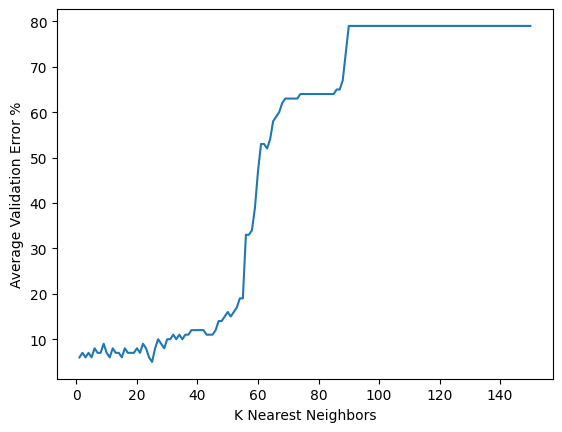

Best k is 25 with average error = 0.08 


In [406]:
kbest = cross_validation(150, 10, X_train, y_train)

In [407]:
Ttest = my_knn(X_train, y_train, X_test, kbest)

countFalse = 0
for i in range (Ttest.size):
    if(Ttest[i]!=y_test[i]):
        countFalse += 1

Tval = np.argmax(Ttest, axis=1)
Tcor = np.argmax(y_test, axis=1)
print ("Error is ", countFalse/X_test.shape[0] * 100, " %" )

Error is  0.0  %


<h2>Part 5 - Gaussian Naive Bayes</h2>

In [408]:
my_X = df.iloc[:, :-1]
my_X = my_X.to_numpy()
my_y = df.iloc[:, -1]
my_y = my_y.to_numpy().reshape(my_y.size, 1)

X_train, X_test, y_train, y_test = train_test_split(my_X, my_y, test_size=0.33, random_state=42)

In [409]:
classes_parameters = np.zeros((3, 2, 4))
classes_cov = np.zeros((3,4,4))

for i in range (3):
    X = df[df['species'] == i]
    mean = X.mean(axis=0).to_numpy()
    std = X.std(axis=0).to_numpy()
    classes_parameters[i][0] = mean[:4]
    classes_parameters[i][1] = std[:4]
    classes_cov[i] = np.cov(X.iloc[:,:-1], rowvar=False)

In [410]:
classes_cov

array([[[0.12424898, 0.10029796, 0.01613878, 0.01054694],
        [0.10029796, 0.14517959, 0.01168163, 0.01143673],
        [0.01613878, 0.01168163, 0.03010612, 0.00569796],
        [0.01054694, 0.01143673, 0.00569796, 0.01149388]],

       [[0.26643265, 0.08518367, 0.18289796, 0.05577959],
        [0.08518367, 0.09846939, 0.08265306, 0.04120408],
        [0.18289796, 0.08265306, 0.22081633, 0.07310204],
        [0.05577959, 0.04120408, 0.07310204, 0.03910612]],

       [[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
        [0.09376327, 0.10400408, 0.07137959, 0.04762857],
        [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
        [0.04909388, 0.04762857, 0.04882449, 0.07543265]]])

In [411]:
classes_parameters

array([[[5.006     , 3.418     , 1.464     , 0.244     ],
        [0.35248969, 0.3810244 , 0.17351116, 0.1072095 ]],

       [[5.936     , 2.77      , 4.26      , 1.326     ],
        [0.51617115, 0.31379832, 0.46991098, 0.19775268]],

       [[6.588     , 2.974     , 5.552     , 2.026     ],
        [0.63587959, 0.32249664, 0.5518947 , 0.27465006]]])

In [412]:
def prior_prob(C):
    return np.count_nonzero(y_train==C)/y_train.size

In [413]:
def likelihood(xi, C):
    C_mean = classes_parameters[C,1]
    C_cov = classes_cov[C]
    C_cov_inv = np.linalg.inv(C_cov)
    C_cov_det = np.linalg.det(C_cov)
    d = C_mean.size
    exponential = np.exp(-1/2 * np.dot(np.dot(np.transpose(xi-C_mean), C_cov_inv), (xi-C_mean)))
    return exponential/((np.power((2*np.pi),(d/2))) * (np.power(C_cov_det, (1/2))))
    

In [414]:
likelihood(X_test[0], 1)

1.0637906237462376e-30

In [415]:
def evidence(x):
    sum = 0
    for i in range (3):
        sum += likelihood(x, i) * prior_prob(i)
    
    return sum

In [416]:
def posterior_prob(C, x):
    return (likelihood(x, C)*prior_prob(C)) / evidence(x)

In [417]:
posterior_prob(1, X_test[0])

8.373583766648692e-11

In [418]:
def naive_bayes(Xtest):
    ytest = np.zeros(Xtest.size)
    n, d = Xtest.shape
    for i in range(n):
        x = Xtest[i]
        max_post=0
        max_c = 0
        for j in range(3):
            if(posterior_prob(j, x)>max_post):
                max_post = posterior_prob(j, x)
                max_c = j
        
        ytest[i]=max_c
    
    return y_test

In [419]:
y = naive_bayes(X_test)

In [420]:
y

array([[1],
       [0],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2]])

In [421]:
count_errors = 0
for i in range(y.size):
    if y[i]!=y_test[i]:
        count_errors += 1
        
print("Naive Bayes error: " + str(count_errors/y.size * 100) + "%")

Naive Bayes error: 0.0%


<h2>Part 6 - Multiplier Perceptron</h2>

In [422]:
import torch.utils.data as data
import torch
import torch.nn as nn
from tqdm import tqdm

In [423]:
my_data = torch.from_numpy(df.to_numpy())

In [424]:
my_data

tensor([[5.1000, 3.5000, 1.4000, 0.2000, 0.0000],
        [4.9000, 3.0000, 1.4000, 0.2000, 0.0000],
        [4.7000, 3.2000, 1.3000, 0.2000, 0.0000],
        [4.6000, 3.1000, 1.5000, 0.2000, 0.0000],
        [5.0000, 3.6000, 1.4000, 0.2000, 0.0000],
        [5.4000, 3.9000, 1.7000, 0.4000, 0.0000],
        [4.6000, 3.4000, 1.4000, 0.3000, 0.0000],
        [5.0000, 3.4000, 1.5000, 0.2000, 0.0000],
        [4.4000, 2.9000, 1.4000, 0.2000, 0.0000],
        [4.9000, 3.1000, 1.5000, 0.1000, 0.0000],
        [5.4000, 3.7000, 1.5000, 0.2000, 0.0000],
        [4.8000, 3.4000, 1.6000, 0.2000, 0.0000],
        [4.8000, 3.0000, 1.4000, 0.1000, 0.0000],
        [4.3000, 3.0000, 1.1000, 0.1000, 0.0000],
        [5.8000, 4.0000, 1.2000, 0.2000, 0.0000],
        [5.7000, 4.4000, 1.5000, 0.4000, 0.0000],
        [5.4000, 3.9000, 1.3000, 0.4000, 0.0000],
        [5.1000, 3.5000, 1.4000, 0.3000, 0.0000],
        [5.7000, 3.8000, 1.7000, 0.3000, 0.0000],
        [5.1000, 3.8000, 1.5000, 0.3000, 0.0000],


In [425]:
import torch.nn.functional as F

# Assume `data` is your tensor
# data_normalized = F.normalize(my_data, p=2.0, dim=1)

train_subset, test_subset = torch.utils.data.random_split(my_data, [100, 50])
train_data = torch.stack([data for data in train_subset])
test_data = torch.stack([data for data in test_subset])



In [426]:
train_data

tensor([[5.1000, 3.8000, 1.9000, 0.4000, 0.0000],
        [4.9000, 3.1000, 1.5000, 0.1000, 0.0000],
        [6.7000, 3.1000, 4.7000, 1.5000, 1.0000],
        [5.8000, 4.0000, 1.2000, 0.2000, 0.0000],
        [7.9000, 3.8000, 6.4000, 2.0000, 2.0000],
        [6.8000, 3.0000, 5.5000, 2.1000, 2.0000],
        [7.0000, 3.2000, 4.7000, 1.4000, 1.0000],
        [5.7000, 4.4000, 1.5000, 0.4000, 0.0000],
        [6.9000, 3.1000, 5.1000, 2.3000, 2.0000],
        [4.9000, 3.1000, 1.5000, 0.1000, 0.0000],
        [6.1000, 3.0000, 4.6000, 1.4000, 1.0000],
        [6.3000, 2.5000, 4.9000, 1.5000, 1.0000],
        [5.7000, 3.8000, 1.7000, 0.3000, 0.0000],
        [4.5000, 2.3000, 1.3000, 0.3000, 0.0000],
        [5.2000, 3.4000, 1.4000, 0.2000, 0.0000],
        [5.1000, 3.5000, 1.4000, 0.2000, 0.0000],
        [6.4000, 3.1000, 5.5000, 1.8000, 2.0000],
        [5.2000, 4.1000, 1.5000, 0.1000, 0.0000],
        [5.0000, 3.5000, 1.6000, 0.6000, 0.0000],
        [5.7000, 2.9000, 4.2000, 1.3000, 1.0000],


In [427]:
class IrisDataset(data.Dataset):
    
    def __init__(self, data, std = 0.1):
        super().__init__()
        n, d = data.shape
        self.size = n
        self.std = std
        self.data = data[:, :-1]
        self.label = data[:, -1]
    
    def __len__(self):
        return self.size
    
    def __getitem__(self, index):
        data_features = self.data[index]
        data_label = self.label[index]
        return data_features, data_label

In [428]:
dataset = IrisDataset(my_data)
print(len(dataset))
print(dataset[0])

150
(tensor([5.1000, 3.5000, 1.4000, 0.2000], dtype=torch.float64), tensor(0., dtype=torch.float64))


In [429]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [430]:
data_inputs, data_labels = next(iter(data_loader))

print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 4]) 
 tensor([[5.6000, 3.0000, 4.5000, 1.5000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000]], dtype=torch.float64)
Data labels torch.Size([8]) 
 tensor([1., 0., 0., 1., 2., 0., 2., 0.], dtype=torch.float64)


In [597]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs): #feel free to experiment
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)
        # self.linear3 = nn.Linear(num_hidden2, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [598]:
input_layer = 4
hidden_layer = 8
hidden2_layer = 3
output_layer = 3

In [599]:
model = SimpleClassifier(num_inputs=input_layer, num_hidden=hidden_layer, num_outputs=output_layer)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=4, out_features=8, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=8, out_features=3, bias=True)
)


In [600]:
loss_module = nn.CrossEntropyLoss()

In [625]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [626]:
train_dataset = IrisDataset(train_data)
train_data_loader = data.DataLoader(train_dataset, batch_size=5, shuffle=True)

In [627]:
device = 'cpu'

In [628]:
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=4, out_features=8, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=8, out_features=3, bias=True)
)

In [629]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device).float()
            data_labels = data_labels.to(device).float()

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=0) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.long())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

In [630]:
train_model(model, optimizer, train_data_loader, loss_module)

100%|██████████| 100/100 [00:03<00:00, 29.27it/s]


In [631]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[ 1.3999e+00,  1.1316e+00, -2.9679e+00, -2.3679e+00],
        [-1.4946e+00,  2.1125e-01, -2.3535e+00, -6.3286e-01],
        [-6.3814e-01, -1.0400e-01,  2.0662e-03, -4.4880e-01],
        [ 3.1566e-01,  3.8087e-01,  3.5663e-01,  3.1830e-01],
        [-5.2027e-01, -3.0404e-01, -4.1690e-01,  4.1419e-01],
        [-6.4633e-01, -1.0416e-01, -2.8876e-01,  2.0590e-01],
        [ 8.2626e-01,  1.0822e+00, -3.0113e+00, -1.8091e+00],
        [-3.2061e+00, -3.8360e+00,  4.6404e+00,  5.4092e+00]])), ('linear1.bias', tensor([ 0.5205,  0.2788, -0.1915,  0.3245,  0.4631,  0.3274,  0.6711, -2.9526])), ('linear2.weight', tensor([[ 3.5279,  2.1669, -0.2358,  0.1584,  0.1261, -0.1490,  2.4450, -2.6617],
        [-1.2426, -0.8007,  0.0212,  0.0440, -0.1409, -0.0279, -1.1906, -0.6652],
        [-2.3159, -1.2775,  0.6167, -0.2923,  0.4396,  0.4751, -1.3086,  2.5269]])), ('linear2.bias', tensor([-0.2070,  0.1572,  0.0166]))])


In [632]:
torch.save(state_dict, "our_model.tar")

In [633]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=input_layer, num_hidden=hidden_layer, num_outputs=output_layer)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[ 1.3999e+00,  1.1316e+00, -2.9679e+00, -2.3679e+00],
        [-1.4946e+00,  2.1125e-01, -2.3535e+00, -6.3286e-01],
        [-6.3814e-01, -1.0400e-01,  2.0662e-03, -4.4880e-01],
        [ 3.1566e-01,  3.8087e-01,  3.5663e-01,  3.1830e-01],
        [-5.2027e-01, -3.0404e-01, -4.1690e-01,  4.1419e-01],
        [-6.4633e-01, -1.0416e-01, -2.8876e-01,  2.0590e-01],
        [ 8.2626e-01,  1.0822e+00, -3.0113e+00, -1.8091e+00],
        [-3.2061e+00, -3.8360e+00,  4.6404e+00,  5.4092e+00]])), ('linear1.bias', tensor([ 0.5205,  0.2788, -0.1915,  0.3245,  0.4631,  0.3274,  0.6711, -2.9526])), ('linear2.weight', tensor([[ 3.5279,  2.1669, -0.2358,  0.1584,  0.1261, -0.1490,  2.4450, -2.6617],
        [-1.2426, -0.8007,  0.0212,  0.0440, -0.1409, -0.0279, -1.1906, -0.6652],
        [-2.3159, -1.2775,  0.6167, -0.2923,  0.4396,  0.4751, -1.3086,  2.5269]])), ('linear2.bias', tensor([-0.2070,  0.1572,  0.0166]))])

Loaded model
 OrderedDict([(

In [634]:
test_dataset = IrisDataset(test_data)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=5, shuffle=True, drop_last=False)

count_1, count_2, count_3= 0, 0, 0
for i in range(test_dataset.size):
    if test_dataset[i][1] == 0:
        count_1 +=1
    elif test_dataset[i][1] == 1:
        count_2 +=1
    elif test_dataset[i][1] == 2:
        count_3 +=1
print(count_1, count_2, count_3)

11 20 19


In [635]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): # Deactivate gradients for the following code
        class1=0
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device).float(), data_labels.to(device).float()
            preds = model(data_inputs)
            preds = F.softmax(preds, dim=1)
            pred_labels = torch.argmax(preds, dim=1)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
            class1 += (data_labels == 1).sum()

    acc = true_preds / (num_preds)
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [636]:
eval_model(model, test_data_loader)

Accuracy of the model: 90.00%


<h2>Part 7 - K-means</h2>

In [637]:
my_data = df.to_numpy()[:,:-1]

In [638]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [639]:
test1 = df[df["species"] == 1]

In [640]:
np.mean(test1)

c:\Users\mikel\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
species         1.000
dtype: float64

In [641]:
my_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [642]:
k = 3
n, d = my_data.shape
means = np.array([[4.,4.,4.,4.],
                 [5.,5.,5.,5.],
                 [3.,3.,3.,3.]])
y = np.zeros(n)

In [643]:
def findY(x, m):
    dist = np.linalg.norm(x-m, axis=1)
    return np.argmin(dist)

def eStep(X, y, m):
    n, d = X.shape
    for i in range(n):
        y[i] = findY(X[i], means)

eStep(my_data, y, means)
print(y)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 0. 0. 2. 0. 0. 0. 2. 0. 2. 2. 0. 2. 0. 2. 0. 0. 2. 0. 2. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 0. 0. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 0.
 0. 0. 2. 2. 1. 0. 1. 0. 0. 1. 2. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0.]


In [644]:
def mStep(X, y, m):
    n,d = X.shape
    for k in range(3):
        sum_x = np.zeros(d)
        counter = 0.0
        for i in range(n):
            if y[i] == k:
                counter += 1
                for j in range(d):
                    sum_x[j] += X[i][j]
        if(counter != 0):
            m[k] = sum_x/counter

mStep(my_data, y, means)
print(means)

[[6.284375   2.9125     4.9484375  1.721875  ]
 [7.28       3.16666667 6.20666667 2.17333333]
 [5.14225352 3.15774648 2.16901408 0.52112676]]


In [645]:
def calcCost(X, y, m):
    cost = 0
    for i in range(y.size):
        k = int(y[i])
        cost += np.square(np.linalg.norm(X[i] - m[k]))/2
    return cost

print(calcCost(my_data, y, means))

88.00810673415494


In [646]:
def K_Means(X, k):
    n, d = X.shape
    y = np.zeros(n)
    means = np.random.randint(low=0, high=10, size=(k, d)).astype(float)
    cost_history = np.array([])
    old_cost = -1
    new_cost = calcCost(X, y, means)
    cost_history = np.append(cost_history, new_cost)
    
    while old_cost != new_cost:
        old_cost = new_cost
        eStep(X, y, means)
        mStep(X, y, means)
        new_cost = calcCost(X, y, means)
        cost_history = np.append(cost_history, new_cost)
        
    return y, means, cost_history

y, m, costs = K_Means(my_data, 3)
print(y)
print(m)
print(costs)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0.
 0. 0. 2. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0.]
[[6.10789474 2.83552632 4.71052632 1.6       ]
 [7.17368421 3.15263158 6.10526316 2.15263158]
 [5.01818182 3.32181818 1.63272727 0.31454545]]
[2508.6         51.0435323   51.0435323]


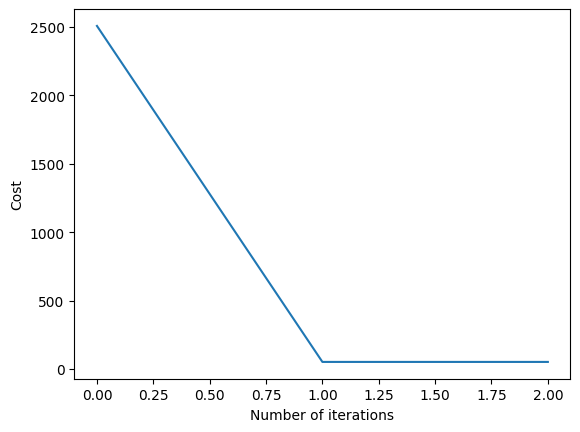

In [647]:
plt.plot(np.arange(costs.size), costs)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

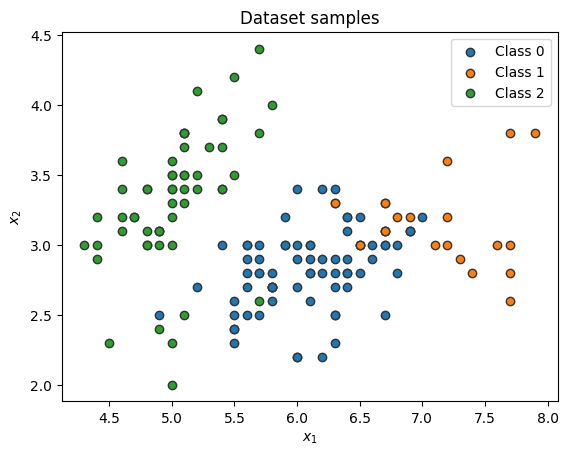

In [648]:
X0 = my_data[y==0]
X1 = my_data[y==1]
X2 = my_data[y==2]

plt.scatter(X0[:,0], X0[:,1], edgecolor="#333", label="Class 0")
plt.scatter(X1[:,0], X1[:,1], edgecolor="#333", label="Class 1")
plt.scatter(X2[:,0], X2[:,1], edgecolor="#333", label="Class 2")
plt.title("Dataset samples")
plt.ylabel(r"$x_2$")
plt.xlabel(r"$x_1$")
plt.legend()

